# Import Datasets form Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!kaggle datasets download -d gauravduttakiit/resume-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip /content/resume-dataset.zip

unzip:  cannot find either /content/resume-dataset.zip or /content/resume-dataset.zip.zip.


# Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [6]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [8]:
df.shape

(962, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


#Exploring Categories

In [10]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Visualize the category column

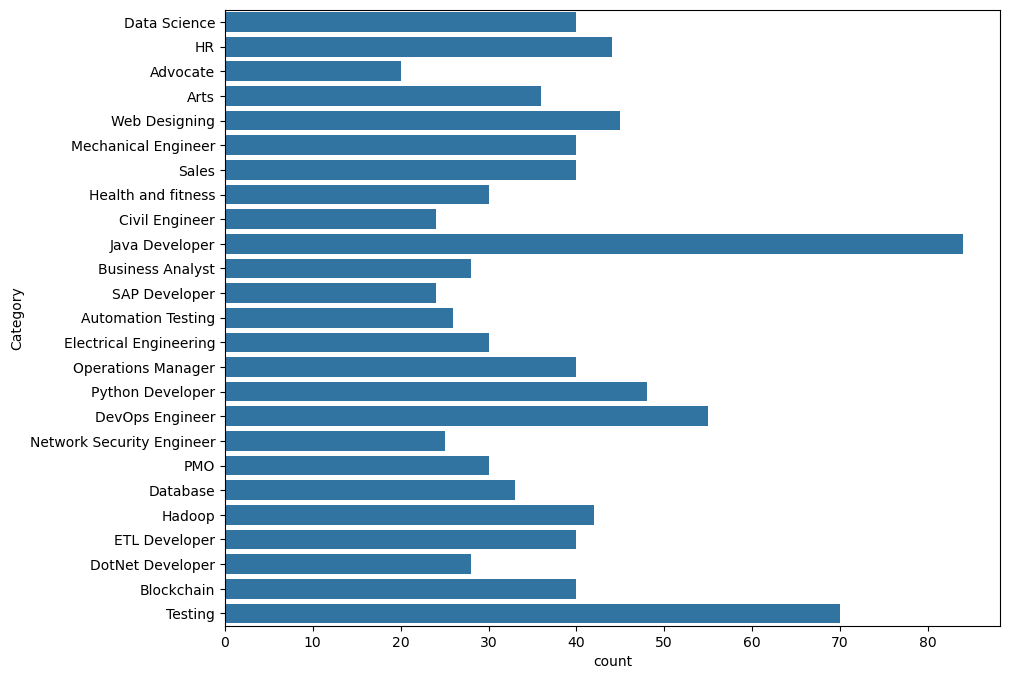

In [11]:
#count of each category
plt.figure(figsize=(10,8))
sns.countplot(df['Category'])
plt.show()

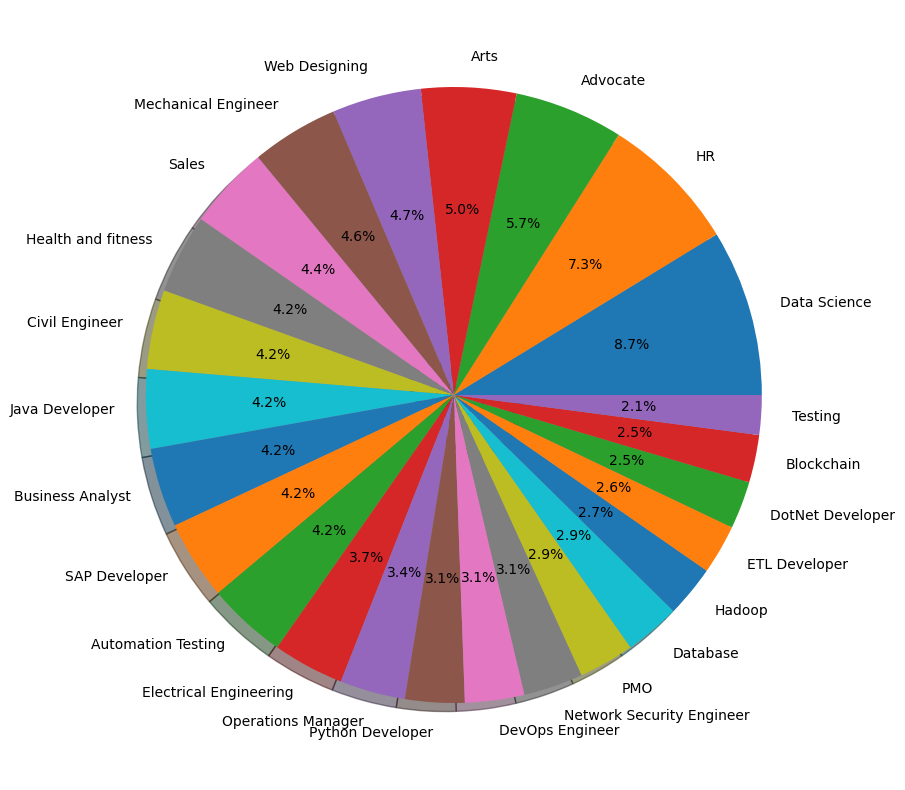

In [12]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize = (28,10))
plt.pie(counts, labels = labels , autopct = "%1.1f%%", shadow = True)
plt.show()

# Balance class : categorical column



Balances the dataset by oversampling smaller classes so that all categoris have an equa number of samples

It prevents issues caused by class imbalance, can lead to poor performance for minority classes.

In [13]:
#Determine the Maximum category size
max_size = df['Category'].value_counts().max()
max_size

84

In [14]:
# Balance the dataset (by oversampling smaller classes)
max_size = df['Category'].value_counts().max()
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

# Shuffle the balanced dataset
df = balanced_df.sample(frac=1).reset_index(drop=True)

print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


Balanced Category Distribution (After Oversampling):
Category
ETL Developer                84
Advocate                     84
Mechanical Engineer          84
Web Designing                84
Database                     84
Business Analyst             84
DevOps Engineer              84
Blockchain                   84
Civil Engineer               84
Health and fitness           84
Operations Manager           84
Hadoop                       84
Testing                      84
SAP Developer                84
Network Security Engineer    84
Arts                         84
Electrical Engineering       84
HR                           84
Data Science                 84
Sales                        84
PMO                          84
DotNet Developer             84
Automation Testing           84
Python Developer             84
Java Developer               84
Name: count, dtype: int64


C:\Users\suyash\AppData\Local\Temp\ipykernel_8708\1921968670.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


Exploring Resume

In [15]:
df['Resume'][0]

'SKILL SET â\x9c\x93 Talend Big Data â\x9c\x93 Informatica Power center â\x9c\x93 Microsoft SQL Server â\x9c\x93 SQL Platform 6.2.1 Management Studio Workbench â\x9c\x93 AWS Services â\x9c\x93 Talend Administration Console â\x9c\x93 Microsoft Visual â\x9c\x93 Redshift (TAC) Studio â\x9c\x93 Athena â\x9c\x93 Data Warehouse Concept - Star â\x9c\x93 SQL â\x9c\x93 S3 Schema, Facts, Dimensions â\x9c\x93 Data Modeling - â\x9c\x93 Data Integration Microsoft Access Education Details \r\nJanuary 2012 to January 2016 BE  Mumbai, Maharashtra University of Mumbai\r\nJanuary 2012 CBSE Technology Kochi, Kerala St. Francis\r\nTalend ETL Developer \r\n\r\nTalend ETL Developer - Tata Consultancy Services\r\nSkill Details \r\nDATA WAREHOUSE- Exprience - 23 months\r\nDATABASE- Exprience - 20 months\r\nINTEGRATION- Exprience - 20 months\r\nINTEGRATOR- Exprience - 20 months\r\nMS SQL SERVER- Exprience - 20 monthsCompany Details \r\ncompany - Tata Consultancy Services\r\ndescription - Prepared ETL mapping D

# Cleaning Data

Remove URLs , hashtags, mentions, special letters and punctuations from the Resume column

In [16]:
import re
def CleanResume(txt) :

  #Remove URLs
  cleanTxt = re.sub('http\S+\S', " " , txt)

  #Remove mensions
  cleanTxt = re.sub('@\S+', ' ', cleanTxt)

  #remove  hashtags
  cleanTxt = re.sub('#\S+', ' ',cleanTxt)

  # Remove retweets
  cleanTxt = re.sub('RT|cc\S+', ' ',cleanTxt)

  #Remove special characters
  cleanTxt = re.sub('[%s]' %re.escape("""!"#$%^&*()+_-={}\:;'",.~|"""), ' ',cleanTxt)

  # Remove non-ASCII characters
  cleanTxt = re.sub(r'[^\x00-\x7f]', ' ',cleanTxt)

  # Remove extra whitespaces
  cleanTxt = re.sub('\s+', ' ',cleanTxt)

   # Convert to lowercase
  cleanTxt = cleanTxt.lower()

  return cleanTxt

<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\:'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:11: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\:'
<>:23: SyntaxWarning: invalid escape sequence '\s'
C:\Users\suyash\AppData\Local\Temp\ipykernel_8708\2620751063.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt = re.sub('http\S+\S', " " , txt)
C:\Users\suyash\AppData\Local\Temp\ipykernel_8708\2620751063.py:8: SyntaxWarning: invalid escape sequence '\S'
  cleanTxt = re.sub('@\S+', ' ', cleanTxt)
C:\Users\suyash\AppData\Local\Temp\ipykernel_8708\2620751063.py:11: SyntaxWarning: 

In [17]:
CleanResume("Hii ####my $ ^ name is http://helloworld and access for it @gmail.com")

'hii name is and a for it '

In [18]:
# Apply the cleaning function to the 'Resume' column
df['Resume'] = df['Resume'].apply(CleanResume)

In [19]:
df['Resume'][0]

'skill set talend big data informatica power center microsoft sql server sql platform 6 2 1 management studio workbench aws services talend administration console microsoft visual redshift tac studio athena data warehouse concept star sql s3 schema facts dimensions data modeling data integration microsoft a education details january 2012 to january 2016 be mumbai maharashtra university of mumbai january 2012 cbse technology kochi kerala st francis talend etl developer talend etl developer tata consultancy services skill details data warehouse exprience 23 months database exprience 20 months integration exprience 20 months integrator exprience 20 months ms sql server exprience 20 monthscompany details company tata consultancy services description prepared etl mapping documents for every mapping and data migration document for smooth transfer of project from development to testing environment and then to production environment performed unit testing and system testing to validate data lo

# Label the Category columns

Here we use label encoder to label each category

In [20]:
from sklearn.preprocessing import LabelEncoder



In [21]:
le = LabelEncoder()

In [22]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [23]:
# Pair labels with their categories
label_category_mapping = dict(enumerate(le.classes_))

# Print the mapping
print("Label to Category Mapping:")
for label, category in label_category_mapping.items():
    print(f"{label}: {category}")


Label to Category Mapping:
0: Advocate
1: Arts
2: Automation Testing
3: Blockchain
4: Business Analyst
5: Civil Engineer
6: Data Science
7: Database
8: DevOps Engineer
9: DotNet Developer
10: ETL Developer
11: Electrical Engineering
12: HR
13: Hadoop
14: Health and fitness
15: Java Developer
16: Mechanical Engineer
17: Network Security Engineer
18: Operations Manager
19: PMO
20: Python Developer
21: SAP Developer
22: Sales
23: Testing
24: Web Designing


# Remove Stopwords


Stopwords are common words (e.g., "the," "is," "and") that often do not add significant meaning in text analysis. Removing stopwords is a common preprocessing step in NLP to focus on meaningful content.

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [25]:
#download stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suyash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\suyash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suyash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [26]:
#Get the list of English stopwords
stop_words = set(stopwords.words('english'))

#Define a function to remove stopwords
def remove_stopwords(text):
  #Tokenize the text
  words = word_tokenize(text)

  #Filter out stopwords
  filtered_words = [word for word in words if word.lower() not in stop_words]

  #join words back into a single string
  return ' '.join(filtered_words)

In [27]:
#Apply stopword function to the resume column
df['Resume'] = df['Resume'].apply(remove_stopwords)

In [28]:
df['Resume'][0]

'skill set talend big data informatica power center microsoft sql server sql platform 6 2 1 management studio workbench aws services talend administration console microsoft visual redshift tac studio athena data warehouse concept star sql s3 schema facts dimensions data modeling data integration microsoft education details january 2012 january 2016 mumbai maharashtra university mumbai january 2012 cbse technology kochi kerala st francis talend etl developer talend etl developer tata consultancy services skill details data warehouse exprience 23 months database exprience 20 months integration exprience 20 months integrator exprience 20 months ms sql server exprience 20 monthscompany details company tata consultancy services description prepared etl mapping documents every mapping data migration document smooth transfer project development testing environment production environment performed unit testing system testing validate data loads target troubleshoot long running jobs fixed issue

# Vectorization

Vectorization is process in machine learning and natural language processing where textual or categorical data is converted into numerical form so model can process it

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = "english")

tfidf.fit(df['Resume'])
required_text = tfidf.transform(df['Resume'])

# Splitting data into Features(X) and Target(y)

In [30]:
X = required_text
y = df['Category']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45, stratify=y)

In [33]:
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (1680, 7252), Test set shape: (420, 7252)


# K- Neighbors classifier

It classify a data point based on the majority class of its nearest neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier #It is use for multi label classifier

In [35]:
# Initialize the K-Neighbors Classifier and the OneVsRestClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())

In [36]:
# Cross-validation to check performance
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(f"\nCross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {cross_val_scores.mean()}")


Cross-Validation Scores: [0.99404762 0.99404762 1.         0.98214286 1.         1.
 0.99404762 1.         0.98809524 0.99404762]
Mean Cross-Validation Score: 0.9946428571428572


In [37]:
# Fit the model
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier())

In [38]:
# Predict the categories on the test set
y_pred = clf.predict(X_test)


In [39]:
y_pred


array([12,  4, 23, 22, 17, 10,  3, 11, 22,  2,  5,  0, 10, 11,  1, 18, 18,
        0,  2,  6,  5, 12,  7, 19, 15,  3,  8, 17,  3, 20, 16, 19, 10, 14,
       13, 20,  4, 11,  2, 19,  1, 13,  7,  4, 20, 24, 20, 24, 11, 20, 19,
       15,  3, 12,  6, 15, 21, 18, 12,  7,  7, 19,  0, 23, 23,  4,  8,  7,
        0,  7,  1, 22, 12, 16,  9,  9, 21, 18, 19,  1, 19, 13,  6, 13, 18,
        4, 12, 13, 16, 15, 24, 11, 15, 22,  1,  8,  1,  3,  5,  1, 14, 10,
       15, 20, 18, 16, 24, 12,  6, 23, 10, 16, 21, 11,  2, 10,  8, 17,  4,
       13,  6, 20,  8, 11, 11, 14, 21, 12,  3,  9, 22, 13, 16,  0,  2,  1,
        7, 19,  4, 16,  9, 10,  3,  8,  3, 15, 10, 16, 14, 16, 21, 17, 15,
        4, 24, 15, 14,  7, 14, 18,  0,  5,  0,  1, 23, 24,  3, 11,  6,  2,
       17, 24,  1, 22,  9,  2, 12, 16, 11,  9, 13,  1, 14, 15, 20, 21,  2,
        2,  5, 15, 17, 22, 19,  0,  7,  0, 11,  3, 24,  2,  7, 19, 12, 12,
       24,  8,  4, 22, 21,  2, 13, 23, 13, 20, 20, 21, 22,  1,  0,  7, 14,
        6,  5, 12,  4,  9

In [40]:
# Calculate the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9928571428571429


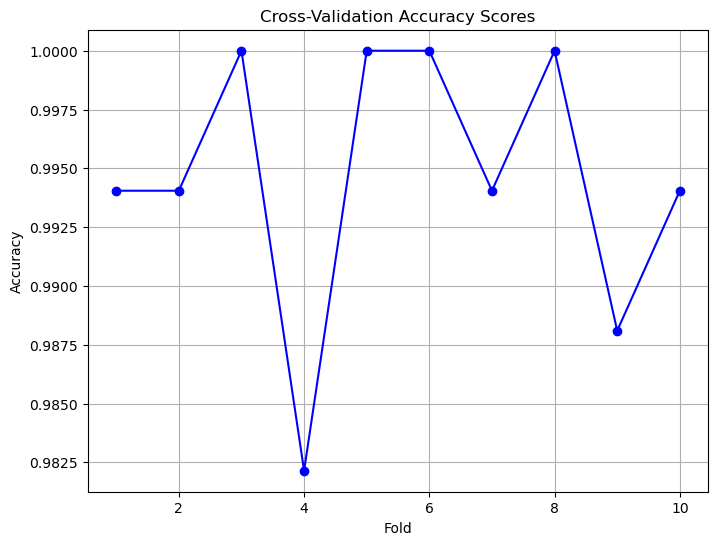

In [41]:
# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), cross_val_scores, marker='o', linestyle='-', color='b')
plt.title("Cross-Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

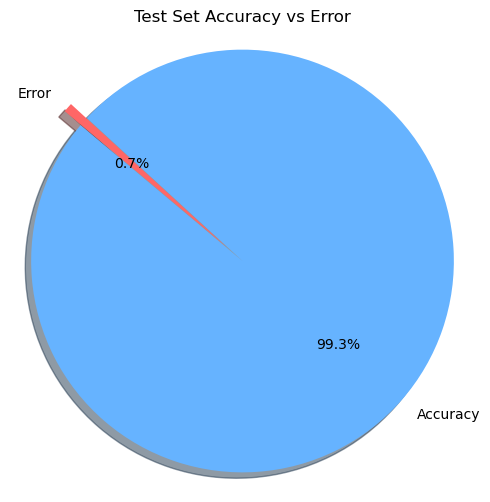

In [42]:
# Plot the test set accuracy using a pie chart
accuracy_percentage = accuracy * 100
error_percentage = (1 - accuracy) * 100

labels = ['Accuracy', 'Error']
sizes = [accuracy_percentage, error_percentage]
colors = ['#66b3ff', '#ff6666']
explode = (0.1, 0)  # "explode" the accuracy slice to highlight it

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Test Set Accuracy vs Error")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  3  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 17

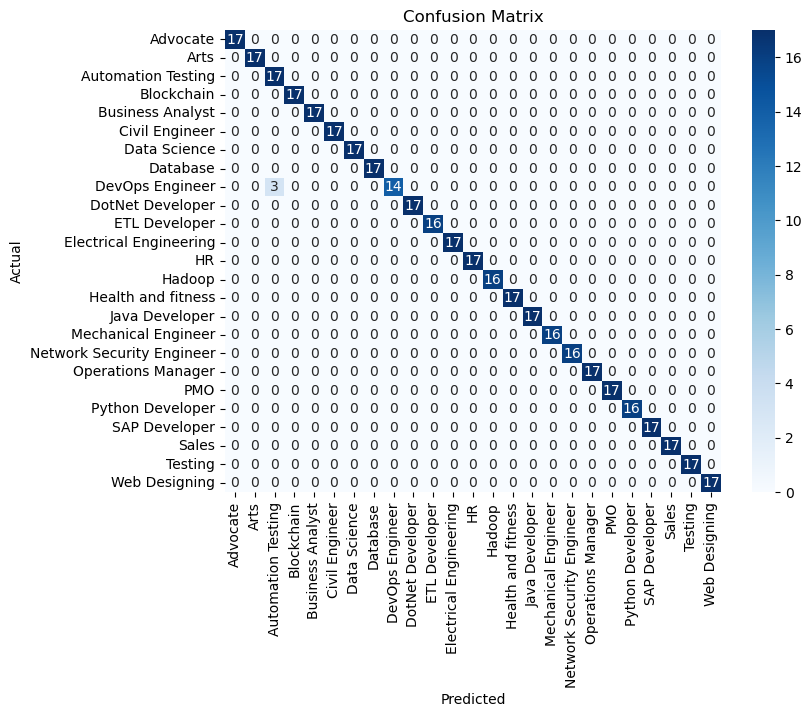

In [44]:
# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Prediction System

In [45]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = CleanResume(input_resume)

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])

    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = clf.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [46]:
myresume = """
PROFILE
A dedicated Data Scientist with knowledge in machine learning, deep learning, and data analysis. Skilled in
Python, SQL, and analytics, aiming to use these abilities to solve problems and create meaningful solutions.
EDUCATION
Dr.D. Y. Patil Pratishthans College of Engineering Kolhapur
B.Tech Data Science
79.77%

05/2024
Kolhapur,India

Government Polytechnic,Kolhapur
Diploma Information Technology
84.38%

08/2021
Kolhapur,India

V. S.Khandekar Prashala,Kolhapur
SSC
79.40%

02/2018
Kolhapur,India

PROFESSIONAL EXPERIENCE
Intern
Python Developer
Gym Management System

06/2023 – 08/2023
Kolhapur,India

•Built a web system using HTML, CSS, Python, and SQL to handle gym
memberships, schedules, and payments.
•Added features like user login, database management, and responsive design for
easy use.
•Improved efciency by simplifying data access and reporting.
PROJECTS
StressFree Mangement System
•Developed a web-based application designed to help users manage and reduce stress.
•The system includes a questionnaire that assesses users stress levels and provides personalized
recommendations to connect them with top experts such as psychologists,Doctors, counselors, gym experts,
and yoga instructors.
Car Price Predictor
•Developed a machine learning model using Random Forest Regression to predict the market price of used
cars.
•The model utilizes features such as Present_Price, Selling_Price, Kms_Driven, Fuel_Type, and Year to
estimate accurate car prices.
•Aimed to assist both buyers and sellers in determining fair prices, avoiding overpayment or underpricing.
•Evaluated the model's performance to ensure accurate predictions for the used car market.
Movie Recommendation System
•Built a movie recommendation system using collaborative ltering and content-based ltering techniques.
•Applied SVD for collaborative ltering and TF-IDF for content-based recommendations using the MovieLens
dataset.
•Developed an interactive Streamlit app to provide personalized movie suggestions.
•Evaluated model accuracy using RMSE to ensure reliable recommendations.

SKILLS
Programming: Python, SQL, C, CPP
ML Libraries: Numpy, Pandas, Matplotlib, Sklearn, etc.
BI Tools: Power BI
UI Tech: HTML, CSS
Platform/IDE'S: Jupyter Notebook, Google Colab
CERTIFICATES
Fundametal of C and Data
structure
APTECH

Data Science and Machine
Learning
YBI Foundation

LANGUAGES
English Hindi Marathi


"""

In [47]:
pred(myresume)

'Data Science'

In [48]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018
Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""


In [49]:
pred(myresume)

'Health and fitness'

# Save Files

In [50]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))
pickle.dump(le, open('encoder.pkl','wb'))